Importing the Libraries 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Importing the data

In [62]:
iris = pd.read_excel("jain.xlsx")
X = iris.iloc[:, [0, 1]].values

target = iris.iloc[:,2].values

scaler = StandardScaler()
x = scaler.fit_transform(X)

Viewing the Data

In [63]:
x

array([[-2.41814406,  0.52552616],
       [-2.15734576,  0.50279763],
       [-1.95791176,  0.31339314],
       [-1.99370761,  0.53310234],
       [-1.94768438,  0.56340706],
       [-1.97325284,  0.87403041],
       [-2.02438976,  0.92706367],
       [-2.08064038,  1.00282546],
       [-2.14711837,  1.14677287],
       [-2.1982553 ,  1.36648207],
       [-2.17780053,  1.47254859],
       [-2.09598145,  1.47254859],
       [-2.04484453,  1.19980613],
       [-1.75847777,  0.35885022],
       [-1.71245454,  0.66189739],
       [-1.76870515,  0.98767311],
       [-1.77381884,  1.17707759],
       [-1.89654746,  1.27556792],
       [-1.9323433 ,  1.46497241],
       [-1.82495577,  1.46497241],
       [-1.87609269,  1.5407342 ],
       [-1.96302546,  1.70741015],
       [-2.02950345,  1.78317194],
       [-1.97325284,  1.85893373],
       [-1.66643131,  2.15440473],
       [-1.45676993,  2.35896157],
       [-1.49767947,  2.02560968],
       [-1.55393008,  1.35890589],
       [-1.34938239,

Viewing the target

In [50]:
target

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Ploting the data according to target 

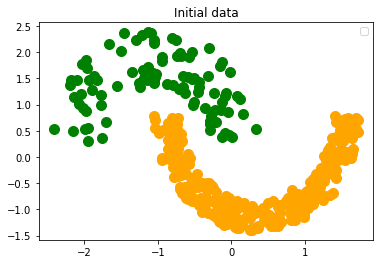

In [64]:
# plt.scatter(x[target == 0, 0], x[target == 0, 1], s = 100, c = 'purple')
plt.scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
plt.scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')

plt.title('Initial data')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

FINDING THE BEST K BY ELBOW METHOD

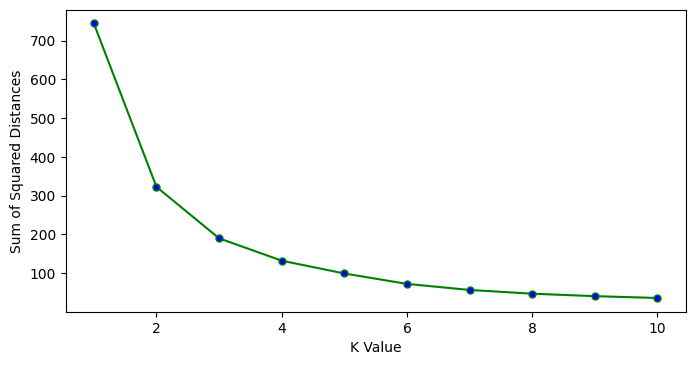

In [65]:
from sklearn.cluster import KMeans
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30
clusters = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(x)
    ssd.append(model.inertia_)
    clusters.append(model)
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");
  

WE CAN CLEARLY SEE THAT ELBOW IS AT 4 BUT STILL LETS CHECK THE SILHOUTTE SCORE

In [66]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(x, clusters[i].predict(x)))

---------------------------------------
KMeans(n_clusters=2)
Silhouette score: 0.504053343540688
---------------------------------------
KMeans(n_clusters=3)
Silhouette score: 0.4968214798120788
---------------------------------------
KMeans(n_clusters=4)
Silhouette score: 0.46947462822355135
---------------------------------------
KMeans(n_clusters=5)
Silhouette score: 0.46191530626071314
---------------------------------------
KMeans(n_clusters=6)
Silhouette score: 0.4854762993459331
---------------------------------------
KMeans(n_clusters=7)
Silhouette score: 0.4781468072936115
---------------------------------------
KMeans()
Silhouette score: 0.4713667094158296
---------------------------------------
KMeans(n_clusters=9)
Silhouette score: 0.46298792611655054


Applying  Kmeans 

In [67]:
kmeans = KMeans(n_clusters = 2, max_iter = 100, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Viewing the the cluster formation

In [68]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Ploting the clusturing result

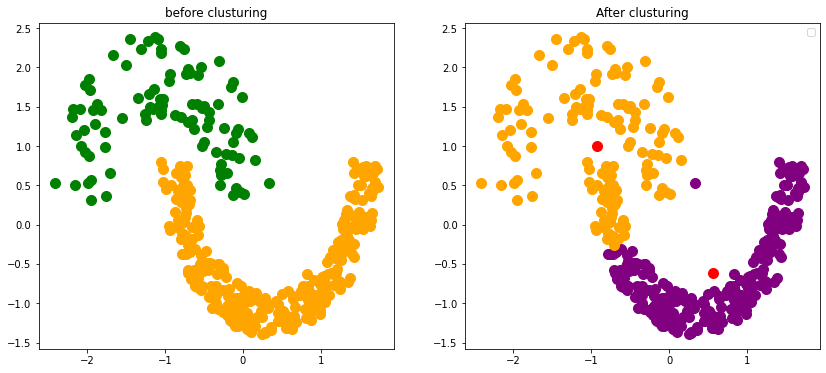

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[1].scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple')
axes[1].scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange')
axes[1].scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')
axes[1].scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'pink')
axes[1].set_title('After clusturing')
#Plotting the centroids of the clusters
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red' )
# axes[0].scatter(x[target == 0, 0], x[target == 0, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
axes[0].scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
axes[0].scatter(x[target == 3, 0], x[target == 3, 1], s = 100, c = 'red')
axes[0].scatter(x[target == 4, 0], x[target == 4, 1], s = 100, c = 'blue')
axes[0].scatter(x[target == 5, 0], x[target == 5, 1], s = 100, c = 'black')
axes[0].scatter(x[target == 6, 0], x[target == 6, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 7, 0], x[target == 7, 1], s = 100, c = 'pink')
axes[0].set_title('before clusturing')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

In [70]:
print(pd.crosstab(target,y_kmeans))

col_0    0   1
row_0         
1      230  46
2        1  95
